In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("D:\\vit mca\\2nd sem\\sem 2\\Soft Computing\\j component\\diabetes (1).csv")

In [4]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False,

In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
print(data.isnull().sum())
print()
print()
print(data.isnull().any())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [13]:
error = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
data[error].isin([0]).sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
dtype: int64

In [14]:
data[error] = data[error].replace(0,np.NaN)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
si = SimpleImputer(missing_values= np.NaN, strategy="mean")
data[error] = si.fit_transform(data[error])

In [16]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

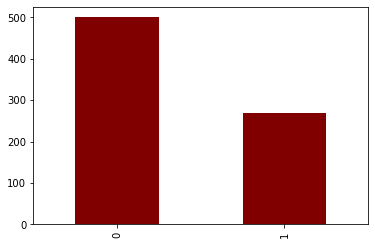

In [18]:
p=data.Outcome.value_counts().plot(kind="bar",color="maroon")

In [19]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


In [20]:
d_major = data[(data['Outcome']==0)]
d_minor = data[(data['Outcome']==1)]
up = resample(d_minor, replace=True, n_samples=500, random_state=42)
df = pd.concat([up,d_major])

In [21]:
df['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

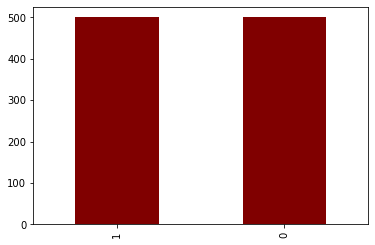

In [22]:
p=df.Outcome.value_counts().plot(kind="bar",color="maroon")

In [23]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190
1,5.084,139.128121,75.708259,31.606015,180.389980,34.738630,0.523510,37.356


In [24]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


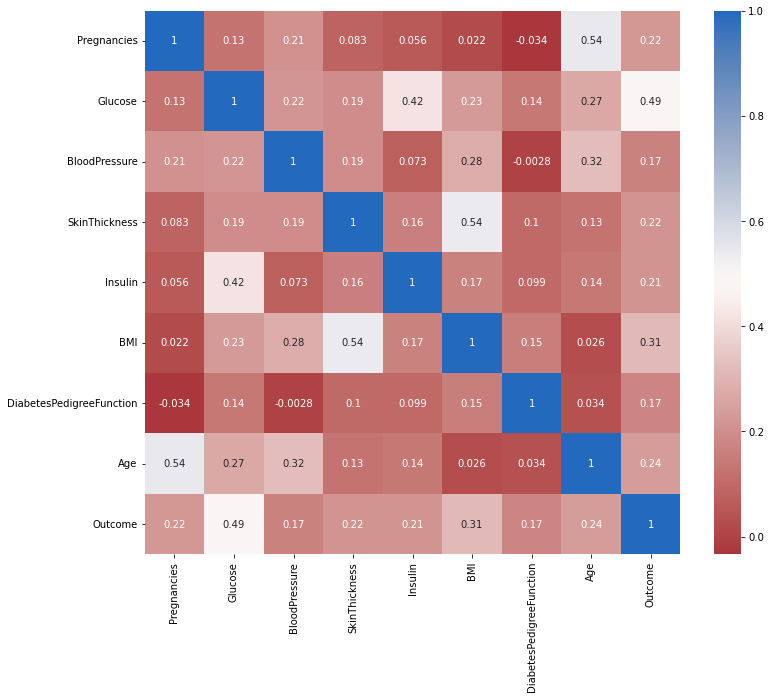

In [25]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(),annot=True,cmap='vlag_r')

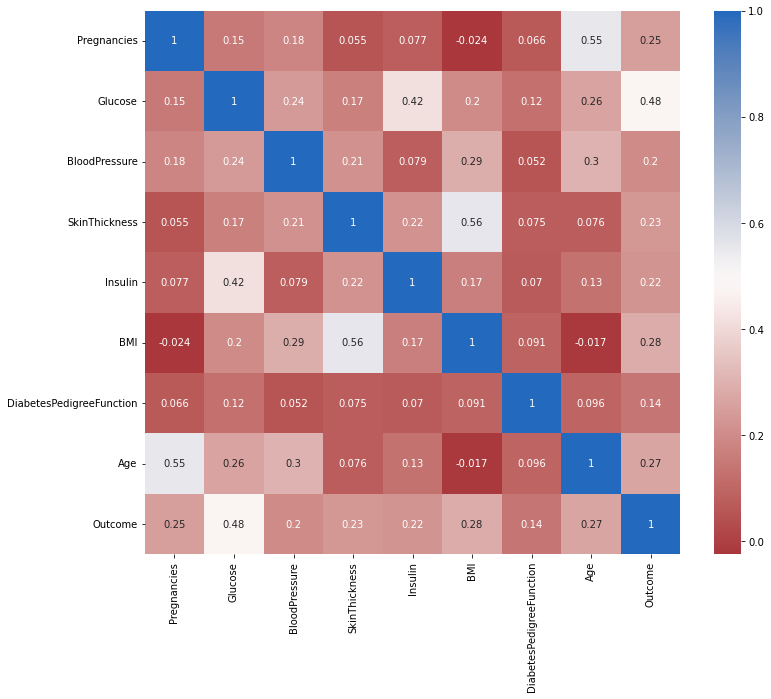

In [26]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(),annot=True,cmap='vlag_r')

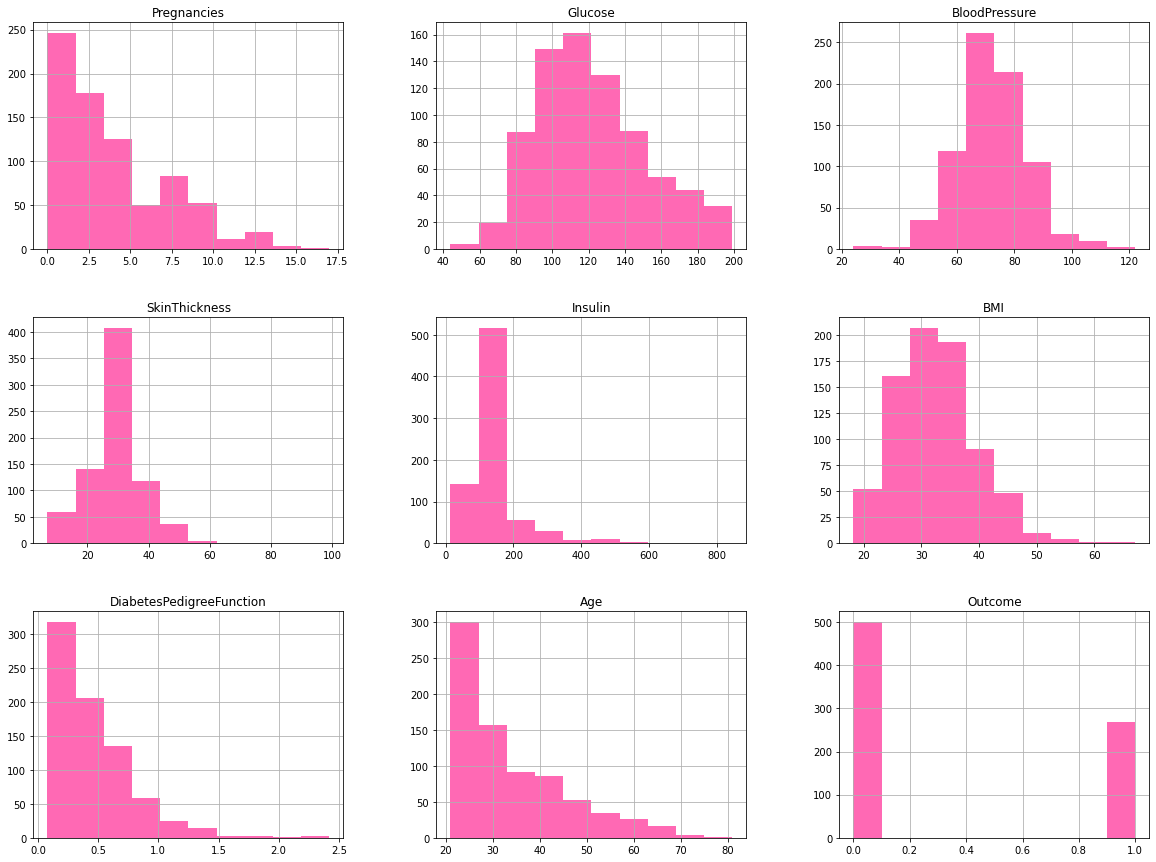

In [27]:
data.hist(figsize=(20,15), color="hotpink")
plt.show()

<AxesSubplot:xlabel='SkinThickness'>

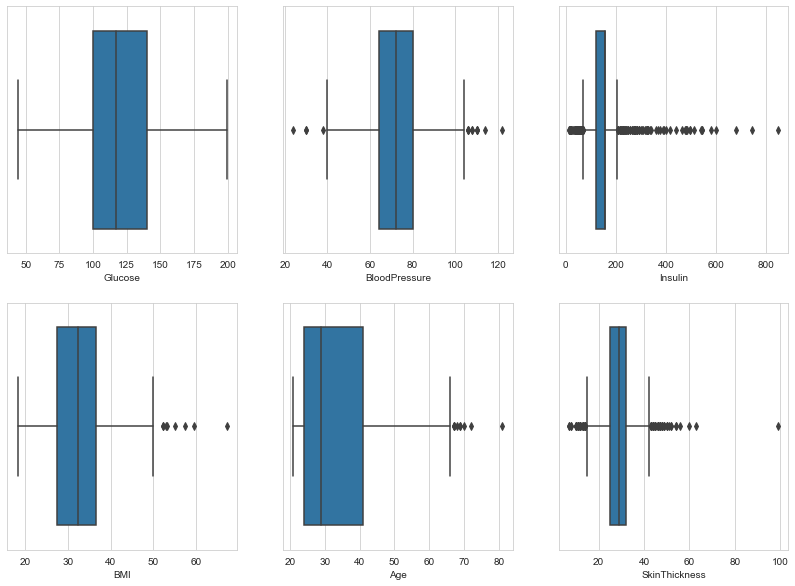

In [28]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

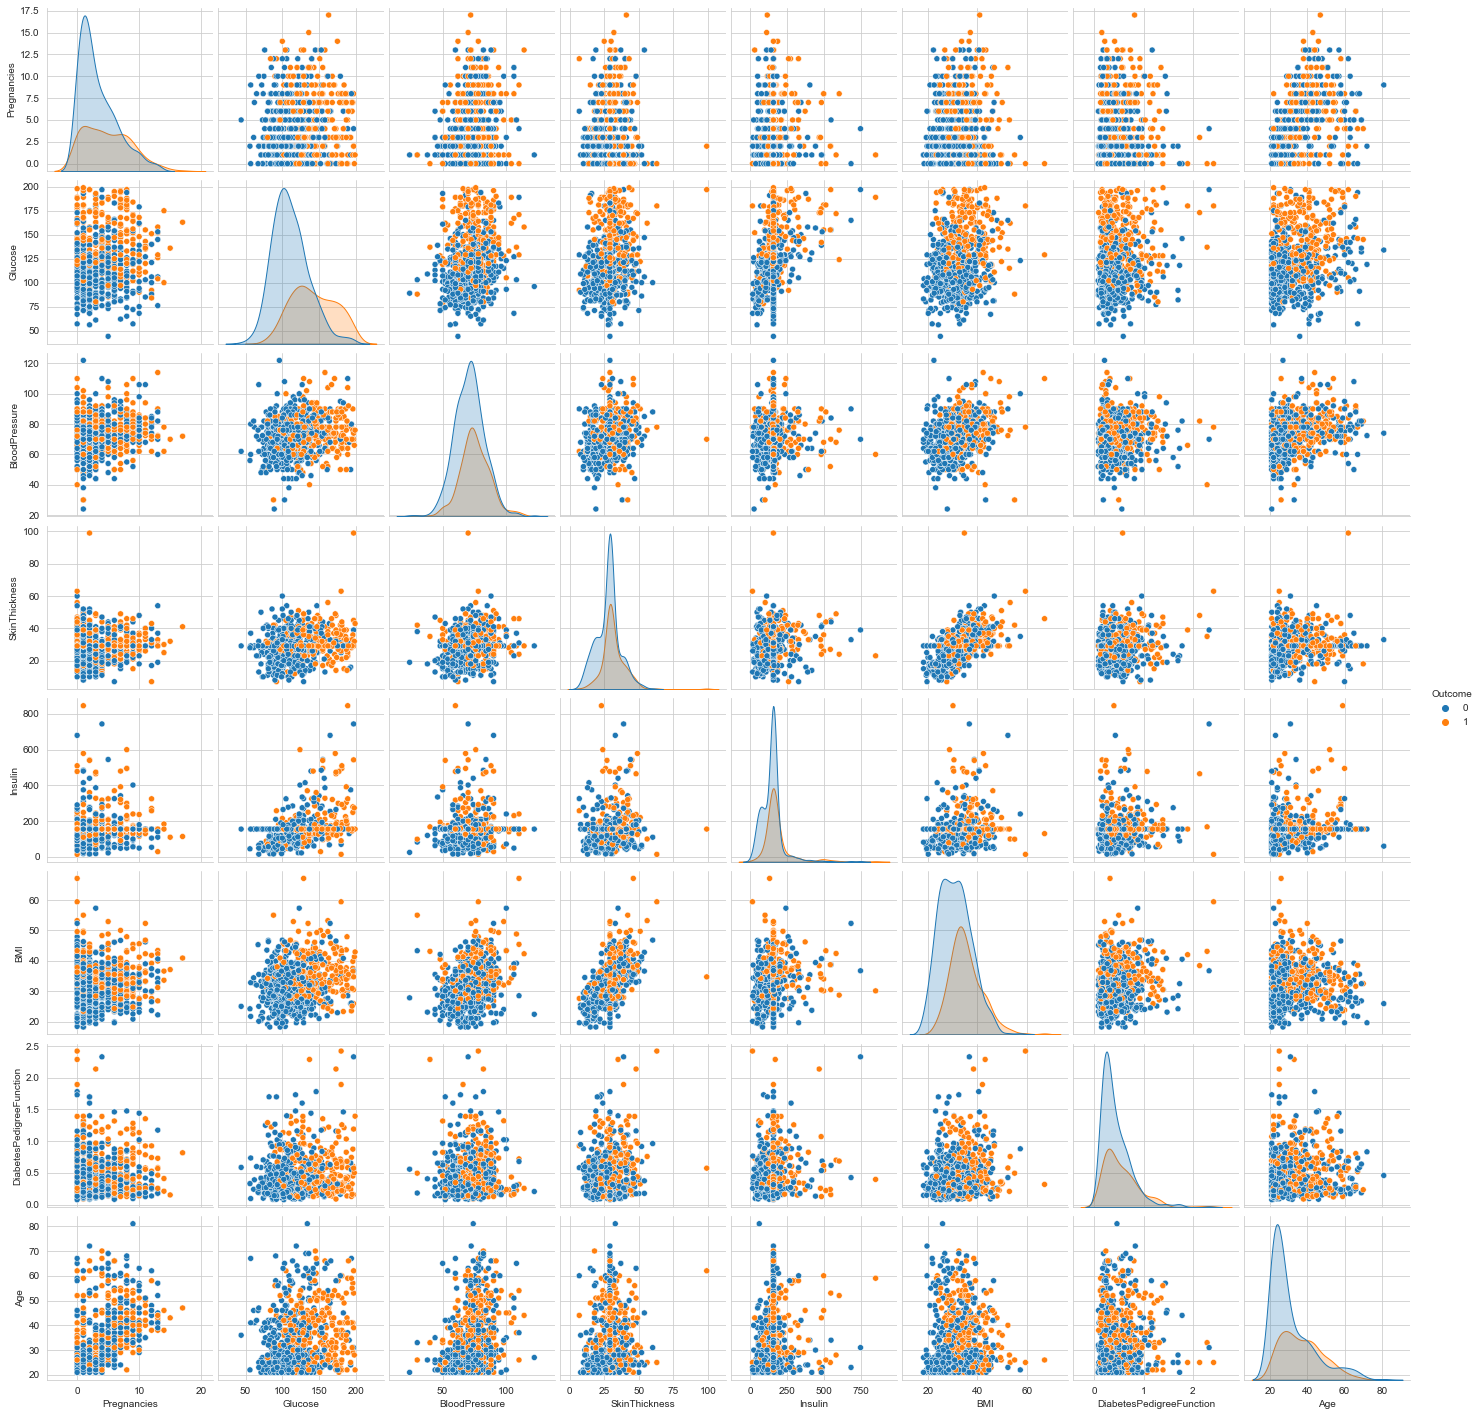

In [29]:
sns.pairplot(data,hue='Outcome')

In [30]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [31]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7
0,-0.614603,0.709896,-0.076623,-0.064181,-0.067263,-0.785842,-0.723173,-0.539941
1,0.787960,1.215019,1.059772,-0.064181,-0.067263,-0.356948,-0.952391,1.095461
2,0.226935,1.113995,0.892592,1.359879,0.569473,0.974102,-0.249456,-0.453867
3,-0.053578,0.238448,-0.076623,-0.064181,-0.067263,0.012788,-0.533686,-0.970310
4,-0.614603,-1.175897,-0.444853,1.480088,-0.067263,0.796629,0.080617,-0.626015


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=26)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc_train = rfc.predict(x_train)
predictions = rfc.predict(x_test)
print("accuracy score = ", format(accuracy_score(y_test,predictions)))

accuracy score =  0.876


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       117
           1       0.84      0.94      0.89       133

    accuracy                           0.88       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.88      0.88       250



In [34]:
cm=confusion_matrix(y_test,predictions)
cm

array([[ 94,  23],
       [  8, 125]], dtype=int64)

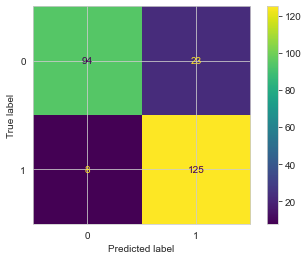

In [35]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
prediction2 = knn.predict(x_test)

In [37]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print("accuracy score = ", format(accuracy_score(y_test,prediction2)))
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[ 80  37]
 [ 29 104]]


accuracy score =  0.736
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.71       117
           1       0.74      0.78      0.76       133

    accuracy                           0.74       250
   macro avg       0.74      0.73      0.73       250
weighted avg       0.74      0.74      0.74       250



In [38]:
lm = LogisticRegression(max_iter=200)
lm.fit(x_train, y_train)
prediction1 = lm.predict(x_test)

In [39]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print("accuracy score = ", format(accuracy_score(y_test,prediction1)))
print('Classification Report:\n', classification_report(y_test, prediction1))

Confusion Matrix:
 [[86 31]
 [47 86]]


accuracy score =  0.688
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.74      0.69       117
           1       0.74      0.65      0.69       133

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250



In [40]:
print('The accuracy score of Random Forests Model is: ', accuracy_score(y_test, predictions)*100,'%')
print('The accuracy score of K Nearest Neighbors Model is: ', accuracy_score(y_test, prediction2)*100,'%')
print('The accuracy score of Logistic Regression Model is: ', accuracy_score(y_test, prediction1)*100,'%')

The accuracy score of Random Forests Model is:  87.6 %
The accuracy score of K Nearest Neighbors Model is:  73.6 %
The accuracy score of Logistic Regression Model is:  68.8 %


In [41]:
rfc_acc = accuracy_score(y_test, predictions)
knn_acc = accuracy_score(y_test, prediction2)
lr_acc = accuracy_score(y_test, prediction1)

In [42]:
model = ['Random Forests','K Nearest Neighbors','Logistic Regression']
score = [rfc_acc,knn_acc,lr_acc]

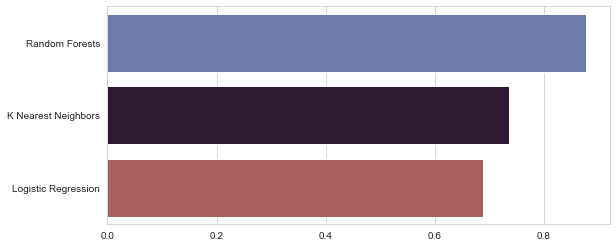

In [43]:
plt.figure(figsize = (9, 4))
sns.barplot(x = score, y = model, palette = 'twilight')
plt.show()

In [44]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [45]:
input_data = (4,110,92,0,0,37.6,0.191,30)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
print(std_data)
pred=rfc.predict(std_data)
if pred==0:
    print('not diabetic')
else:
    print('diabetic')

[[ 4.00000000e+00  1.10000000e+02  9.20000000e+01 -5.82645043e-16
   4.83169060e-16  3.76000000e+01  1.91000000e-01  3.00000000e+01]]
diabetic


In [46]:
import tkinter as tk
from tkinter import messagebox

def predict_data():
    
    preg = preg_entry.get()
    glucose = glucose_entry.get()
    bp = bp_entry.get()
    skinT = skinT_entry.get()
    insulin = insulin_entry.get()
    bmi = bmi_entry.get()
    diabetesPF = diabetesPF_entry.get()
    age = age_entry.get()
    
    print("Pregnancies:", preg)
    print("Glucose:", glucose)
    print("Blood Pressure:", bp)
    print("Skin Thickness:", skinT)
    print("Insulin:", insulin)
    print("BMI:", bmi)
    print("Diabetes Pedigree Function:", diabetesPF)
    print("Age:", age)

    # Prepare the input data for prediction
    data = [[preg, glucose, bp, skinT, insulin, bmi, diabetesPF, age]]

    # Scale the user input using the same scaler used for training
    user_input_scaled = sc.transform(data)

    # Get the prediction for the user input
    prediction = rfc.predict(user_input_scaled)

    if prediction[0] == 0:
        result = 'Not diabetic'
    else:
        result = 'Diabetic'
    # Perform the prediction using the loaded model


    messagebox.showinfo("Diabetes Prediction", "Result = {}".format(result))

# Create the main window
window = tk.Tk()
window.title("Data Entry Form")

# Create labels and entry fields for name and age
preg_label = tk.Label(window, text="Pregnancies:")
preg_label.pack()
preg_entry = tk.Entry(window)
preg_entry.pack()

glucose_label = tk.Label(window, text="Glucose:")
glucose_label.pack()
glucose_entry = tk.Entry(window)
glucose_entry.pack()

bp_label = tk.Label(window, text=" Blood Pressure:")
bp_label.pack()
bp_entry = tk.Entry(window)
bp_entry.pack()

skinT_label = tk.Label(window, text="Skin Thickness:")
skinT_label.pack()
skinT_entry = tk.Entry(window)
skinT_entry.pack()

insulin_label = tk.Label(window, text="Insulin:")
insulin_label.pack()
insulin_entry = tk.Entry(window)
insulin_entry.pack()

bmi_label = tk.Label(window, text="BMI:")
bmi_label.pack()
bmi_entry = tk.Entry(window)
bmi_entry.pack()

diabetesPF_label = tk.Label(window, text="Diabetes Pedigree Function:")
diabetesPF_label.pack()
diabetesPF_entry = tk.Entry(window)
diabetesPF_entry.pack()

age_label = tk.Label(window, text="Age:")
age_label.pack()
age_entry = tk.Entry(window)
age_entry.pack()

# Create a button to submit the data
predict_button = tk.Button(window, text="Predict", command=predict_data)
predict_button.pack()

window.mainloop()